In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

%matplotlib inline

In [5]:
series = np.sin((0.1 * np.arange(400)) ** 2)

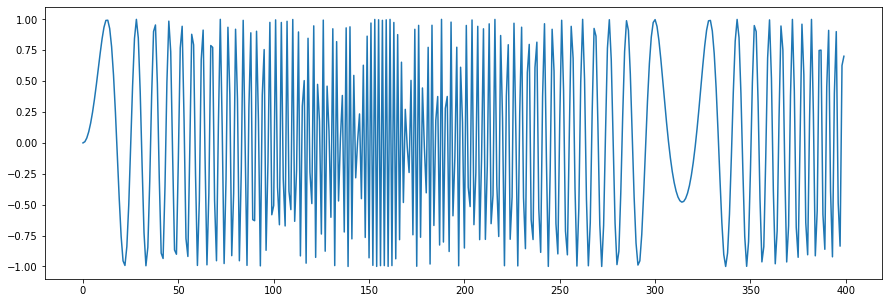

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(series)
plt.show()

In [9]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t + T]
    X.append(x)
    y = series[t + T]
    Y.append(y)
X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)
N = len(X)
print(f"X.shape = {X.shape}, Y.shape = {Y.shape}")

X.shape = (390, 10), Y.shape = (390, 1)


In [14]:
model = nn.Linear(T, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.1)

In [29]:
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

In [16]:
def full_gd(model, 
           criterion, 
           optimizer, 
           X_train, 
           y_train, 
           X_test, 
           y_test, 
           epochs=200):
    
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(X_train)
        loss = criterion(outputs, y_train) 
        train_losses[epoch] = loss.item()
        
        loss.backward()
        optimizer.step()
        
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses[epoch] = test_loss.item()
        
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")
    return train_losses, test_losses

In [17]:
train_losses, test_losses = full_gd(model, 
                                    criterion, 
                                    optimizer, 
                                    X_train, 
                                    y_train, 
                                    X_test, 
                                    y_test)

Epoch 5/200, Train Loss: 0.5541, Test Loss: 0.6483
Epoch 10/200, Train Loss: 0.5035, Test Loss: 0.7017
Epoch 15/200, Train Loss: 0.5171, Test Loss: 0.6965
Epoch 20/200, Train Loss: 0.4933, Test Loss: 0.6146
Epoch 25/200, Train Loss: 0.4894, Test Loss: 0.5734
Epoch 30/200, Train Loss: 0.4902, Test Loss: 0.5590
Epoch 35/200, Train Loss: 0.4853, Test Loss: 0.5897
Epoch 40/200, Train Loss: 0.4851, Test Loss: 0.6159
Epoch 45/200, Train Loss: 0.4846, Test Loss: 0.6036
Epoch 50/200, Train Loss: 0.4839, Test Loss: 0.5832
Epoch 55/200, Train Loss: 0.4838, Test Loss: 0.5786
Epoch 60/200, Train Loss: 0.4834, Test Loss: 0.5902
Epoch 65/200, Train Loss: 0.4836, Test Loss: 0.5968
Epoch 70/200, Train Loss: 0.4834, Test Loss: 0.5912
Epoch 75/200, Train Loss: 0.4834, Test Loss: 0.5868
Epoch 80/200, Train Loss: 0.4834, Test Loss: 0.5875
Epoch 85/200, Train Loss: 0.4833, Test Loss: 0.5913
Epoch 90/200, Train Loss: 0.4833, Test Loss: 0.5912
Epoch 95/200, Train Loss: 0.4833, Test Loss: 0.5890
Epoch 100/200

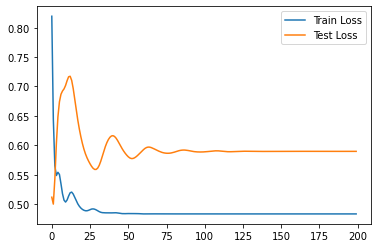

In [19]:
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()

In [20]:
validation_target = Y[-N//2:]
with torch.no_grad():
    validation_predictions = model(X_test).numpy()

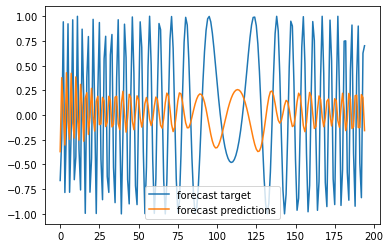

In [21]:
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend()
plt.show()

In [27]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
    input_ = last_x.reshape(1, -1)
    p = model(input_)
    
    validation_predictions.append(p[0, 0].item())
    
    last_x = torch.cat((last_x[1:], p[0]))

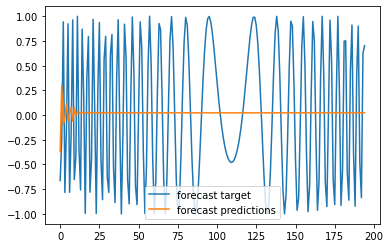

In [28]:
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend()
plt.show()